Medium K-Means Clustering (Clustering Reporting After Pick k)

Objective

Generate cluster profiles (mean & std per feature) for the chosen number of clusters to understand cluster characteristics.

Load Dataset and importing libraries


In [1]:
#Load Dataset and importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Information about data and data preprocessing

In [2]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().values.any()


np.False_

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Data Visualization

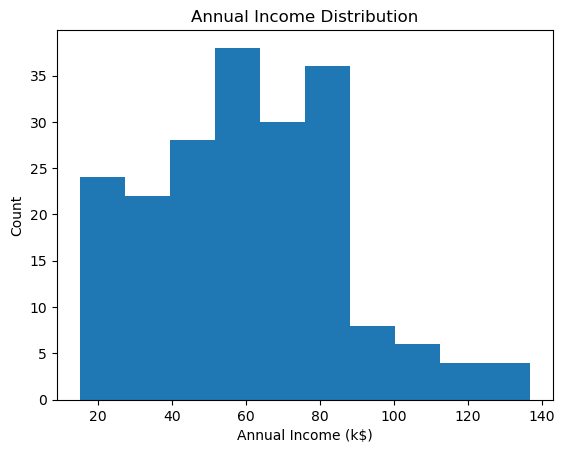

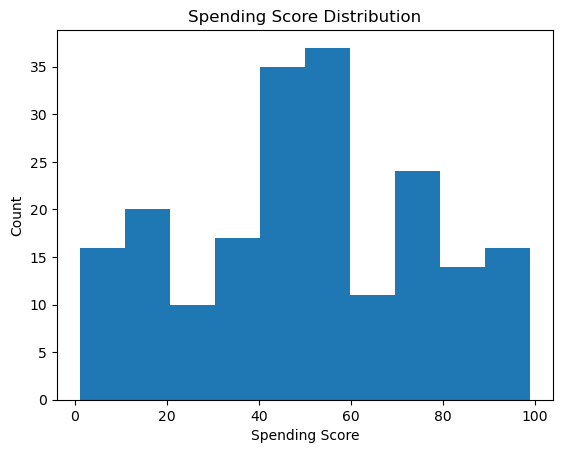

In [12]:
# Histogram of Annual Income
plt.hist(df["Annual Income (k$)"], bins=10)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

# Histogram of Spending Score
plt.hist(df["Spending Score (1-100)"], bins=10)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


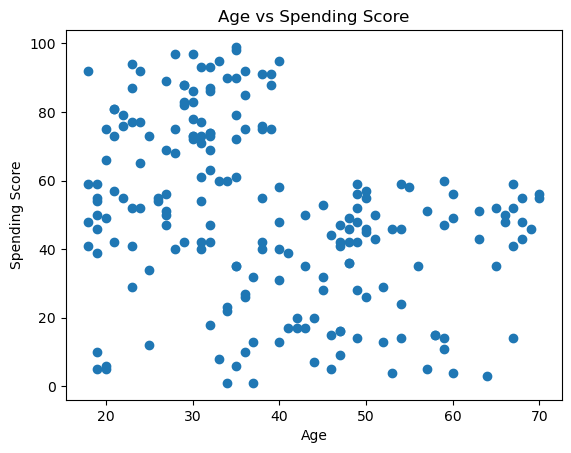

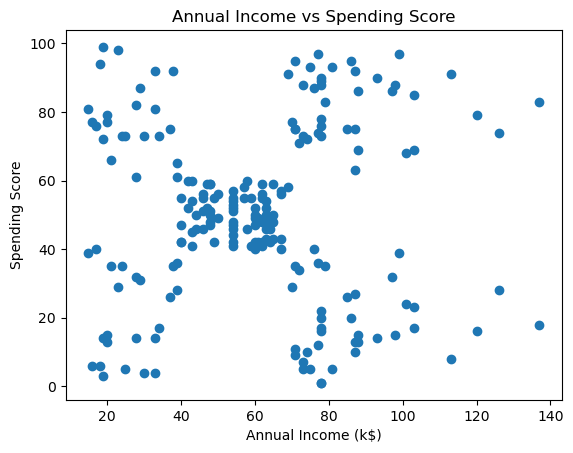

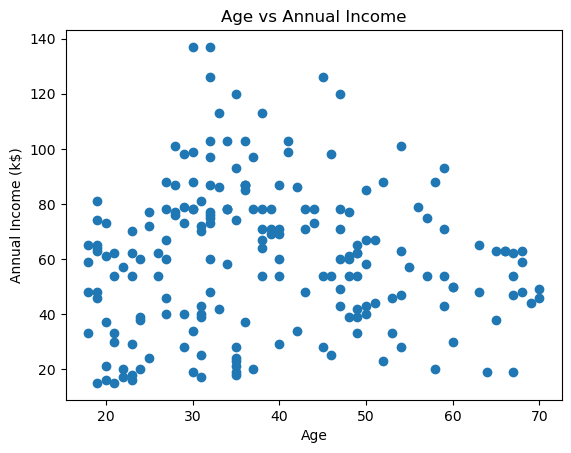

In [13]:
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Annual Income vs Spending Score")
plt.show()

plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income")
plt.show()

Scaling Data

In [14]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow Method and plotting Inertia vs Number of Clusters

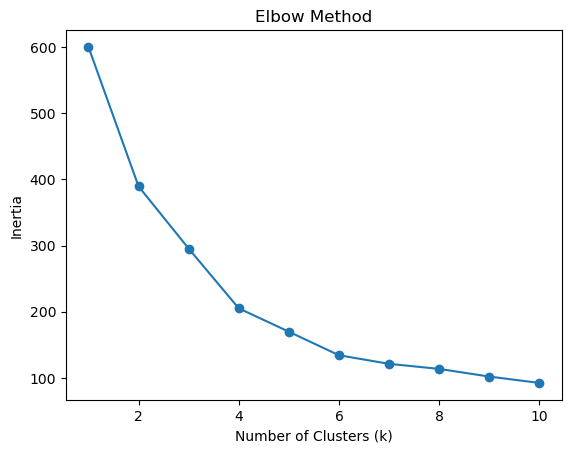

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Supporting Plot: Cluster Scatter

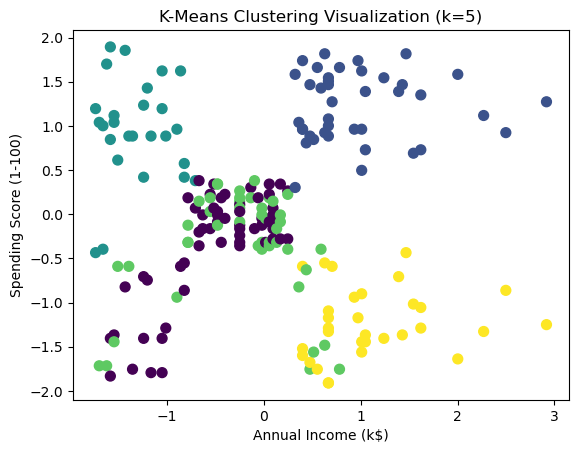

In [17]:
optimal_k=5
km = KMeans(n_clusters=optimal_k, random_state=42)
labels = km.fit_predict(X_scaled)

plt.scatter(X_scaled[:,1], X_scaled[:,2], c=labels, cmap='viridis', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"K-Means Clustering Visualization (k={optimal_k})")
plt.show()


In [18]:
# We already have `optimal_k` from Elbow Method
# KMeans clustering
km = KMeans(n_clusters=optimal_k, random_state=42)
labels = km.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_clusters = df.copy()
df_clusters['Cluster'] = labels

# Cluster profile: mean & std per feature
cluster_profile_mean = df_clusters.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_profile_std = df_clusters.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].std()

print("Cluster Profile - Mean:\n", cluster_profile_mean)
print("\nCluster Profile - Std:\n", cluster_profile_std)


Cluster Profile - Mean:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871

Cluster Profile - Std:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        8.571256           13.413567               15.697814
1        3.857643           16.339036                9.999968
2        5.435496            8.557228               15.069684
3        7.085196           16.162277               16.285552
4        8.232770           16.754521               10.194348


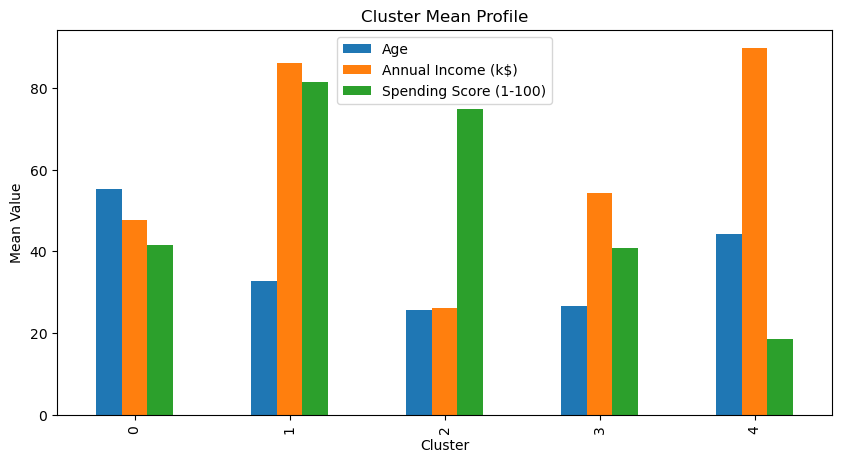

In [19]:
# Plot 1: Mean profile
cluster_profile_mean.plot(kind='bar', figsize=(10,5))
plt.title("Cluster Mean Profile")
plt.ylabel("Mean Value")
plt.show()

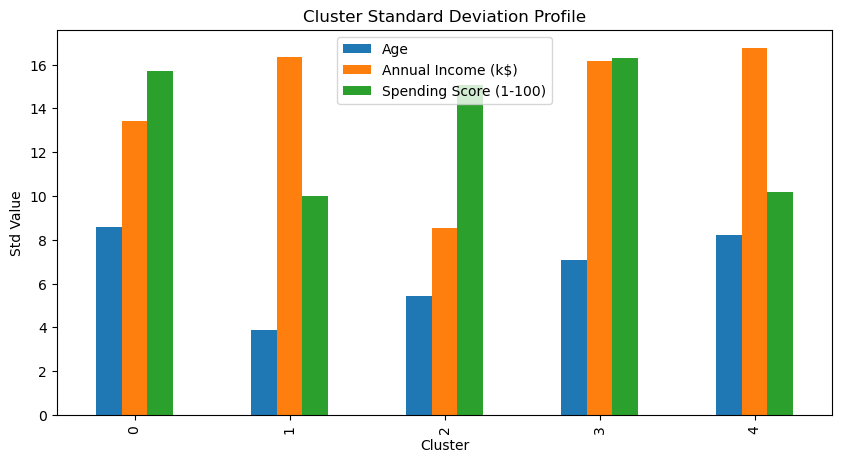

In [20]:
# Plot 2: Std profile
cluster_profile_std.plot(kind='bar', figsize=(10,5))
plt.title("Cluster Standard Deviation Profile")
plt.ylabel("Std Value")
plt.show()